# 1. Import Data and Numpy, Pandas, Matplotlib, Seaborn

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# imported seaborn as snsa
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
UberData = pd.read_csv("Uber Request Data.csv")
UberData.head(5)
UberData.tail(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


# 2. Data Cleaning

In Data Cleaning, Checked Duplicate rows if available, using info checked non-null values in each variable, Converted Column Request timestamp and Drop timestamp to Date Time and created derived variables

### 2(a) - Cleaning

In [184]:
# to display full output in Jupyter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [185]:
# for checking duplicated rows based on request id
dup_chk = UberData["Request id"].duplicated()
dup_chk.sum()

0

In [186]:
# Part of Data Cleaning
UberData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [187]:
# Checking Value Labels
UberData['Pickup point'].value_counts()
UberData['Status'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

### 2(b) - Creating derived variables

In [188]:
# Convertion of Columns Request and Drop timestamp to Date Time 
import datetime
UberData['Request timestamp'] = pd.to_datetime(UberData['Request timestamp'])
UberData['Drop timestamp'] = pd.to_datetime(UberData['Drop timestamp'])

# create derived variables
UberData['Req_day']=UberData['Request timestamp'].dt.day
UberData['Req_month']=UberData['Request timestamp'].dt.month
UberData['Req_year']=UberData['Request timestamp'].dt.year
UberData['Req_dayofweek']=UberData['Request timestamp'].dt.day_name()
UberData['Req_time']=UberData['Request timestamp'].dt.time
UberData['Req_hour']=UberData['Request timestamp'].dt.hour
UberData['Req_mint']=UberData['Request timestamp'].dt.minute
UberData['Req_hour_disc']=UberData['Req_hour'].astype(str)


# creating variable Time Slot as TimeCat from Hours
UberData.loc[(UberData.Req_hour >=0) & (UberData.Req_hour < 4) ,'TimeCat'] ='Late Night'
UberData.loc[(UberData.Req_hour >=4) & (UberData.Req_hour < 5) ,'TimeCat'] ='Early Morning'
UberData.loc[(UberData.Req_hour >=5) & (UberData.Req_hour < 10) ,'TimeCat'] ='Morning*'
UberData.loc[(UberData.Req_hour >=10) & (UberData.Req_hour < 17) ,'TimeCat'] ='Afternoon'
UberData.loc[(UberData.Req_hour >=17) & (UberData.Req_hour < 21) ,'TimeCat'] ='Evening*'
UberData.loc[(UberData.Req_hour >=21) ,'TimeCat'] ='Night'

UberData.head(5)
#UberData.info()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_day,Req_month,Req_year,Req_dayofweek,Req_time,Req_hour,Req_mint,Req_hour_disc,TimeCat
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,2016,Monday,11:51:00,11,51,11,Afternoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,11,2016,Monday,17:57:00,17,57,17,Evening*
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,12,2016,Wednesday,09:17:00,9,17,9,Morning*
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,12,2016,Wednesday,21:08:00,21,8,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,7,2016,Wednesday,08:33:16,8,33,8,Morning*


# 3. Creating Visulas - Plotting Graphs

### 3(a) - Plot Showing Percentage of Status labels in Pie Chart

([<matplotlib.patches.Wedge at 0x19e909e9a20>,
 [Text(0.274502,1.0652,'Trip Completed'),
  Text(-0.819798,-0.733438,'No Cars Available'),
  Text(0.914812,-0.610834,'Cancelled')],
 [Text(0.149728,0.581018,'42.0%'),
  Text(-0.447162,-0.400057,'39.3%'),
  Text(0.498988,-0.333182,'18.7%')])

(-1.1178230389955717,
 1.1008487161426463,
 -1.1233140737657692,
 1.1259343281394145)

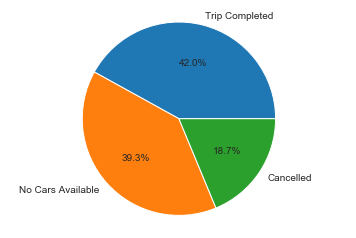

In [189]:
#Status distribution in pie Chart
UberData.loc[(UberData.Status =="Trip Completed"),'TripComp'] =1
UberData.loc[(UberData.Status =="No Cars Available"),'NoCars'] =1
UberData.loc[(UberData.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [UberData['TripComp'].value_counts()[1],
         UberData['NoCars'].value_counts()[1],
         UberData['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

### 3(b1)- Plot Showing Hourly distribution of Request

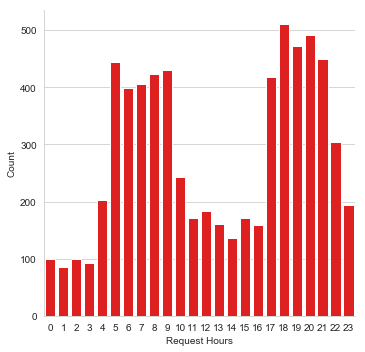

In [190]:
# Hourly distribution of Request Recieved

g=sns.catplot(x="Req_hour",kind="count",palette=sns.color_palette(['red']),data=UberData)
g.set_axis_labels("Request Hours" ,"Count")

### 3(b2)- Plot Showing Hourly distribution of Request by Pickup point

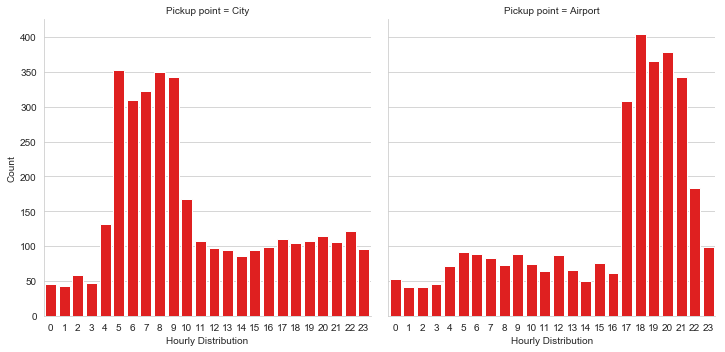

In [191]:
# Hourly distribution by Pickup point

g=sns.catplot(x="Req_hour",col="Pickup point",kind="count",col_order = ['City','Airport'],
              palette=sns.color_palette(['red']),
              data=UberData)
g.set_axis_labels("Hourly Distribution" ,"Count")

### 3(c) - Plot Showing frequency of requests that get cancelled or show 'No cars Available'

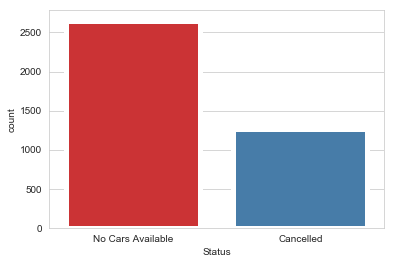

In [192]:
# count of cancelled or 'No cars Available'

sns.countplot(x="Status", palette="Set1", linewidth=5, data=UberData[UberData.Status != 'Trip Completed'], 
              order = ['No Cars Available','Cancelled'])

### 3(d) - Identifying most problematic types of requests (city to airport / airport to city)

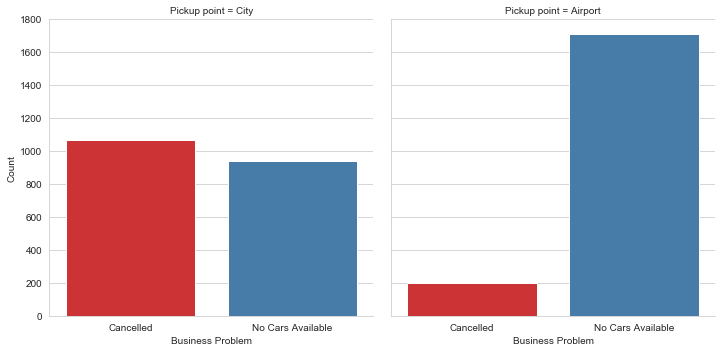

In [193]:
#most problematic types of requests (city to airport / airport to city

g = sns.catplot(x="Status",col="Pickup point",kind="count", palette="Set1", data=UberData[UberData.Status != 'Trip Completed'])
g.set_axis_labels("Business Problem" ,"Count")

### 3(e) - Request at Different Time Slots

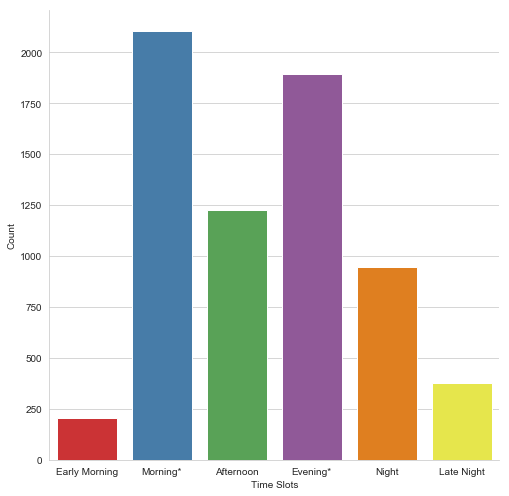

In [194]:
#Time Slot Distribution
g=sns.catplot(x="TimeCat",kind="count",
              order=["Early Morning","Morning*","Afternoon","Evening*","Night","Late Night"],
              palette=sns.color_palette('Set1'),
              data=UberData,height=7)
g.set_axis_labels("Time Slots" ,"Count")

# Note : * Showing Peak Hours in Time Slots

### 3(f) - Business Problem by Different Time Slots

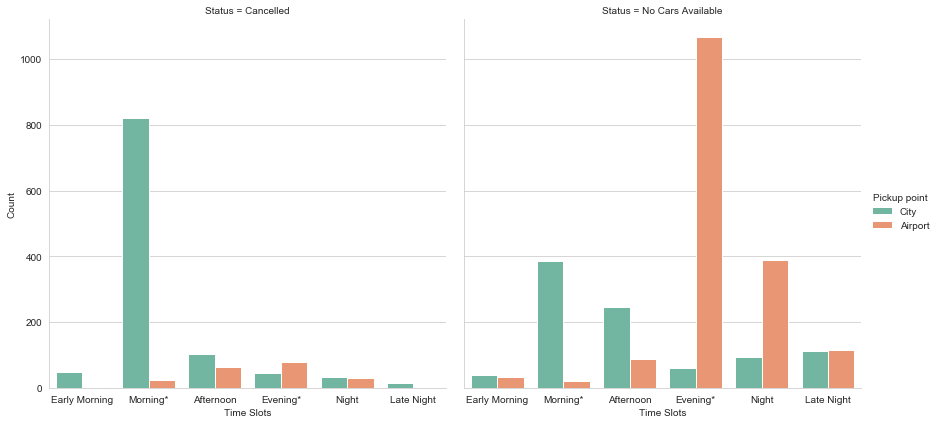

In [195]:
# (city to airport / airport to city) - Major Problem is Non Availiliby of Cars at Airport due to Cancellation in the City

g=sns.catplot(x="TimeCat",col="Status",kind="count",hue="Pickup point",
              order=["Early Morning","Morning*","Afternoon","Evening*","Night","Late Night"],
              palette=sns.color_palette('Set2'),
              data=UberData[UberData.Status != "Trip Completed"],height=6)
g.set_axis_labels("Time Slots" ,"Count")

# Note : * Showing Peak Hours in Time Slots

# 4. Supply, Demand and Gap Analysis

#### Data Preparation

For Supply Demand Analysis created copy of the UberData and appended on Existing data to generate Counts of Demand by filling all values in Status as "Demand" before using append.

After, using append changed the existing labels of Cancelled and No Cars Available to Gap & Trip Completed to Supply using replace.

Also, Created variable Demand/Supply and recoded Demand, Gap, Supply as 1 to generate Pivot

In [196]:
# supply, demand and Gap

# Creating Copy of Data and Changing Status to Demand
UberData1 = UberData.copy(deep=True)
UberData1['Status']='Demand'

# appending copy of data on data and Changing row labels to Gap and Supply
UberData2 = UberData.append(UberData1)
UberData2["Status"]= UberData2["Status"].replace(["Cancelled","No Cars Available"],"Gap")
UberData2["Status"]= UberData2["Status"].replace("Trip Completed","Supply")

# Creating a variable Demand/Supply and recoding using column Status to take counts in Pivot
UberData2.loc[(UberData2.Status =="Demand"),'Demand/Supply'] =1
UberData2.loc[(UberData2.Status =="Gap"),'Demand/Supply'] =1
UberData2.loc[(UberData2.Status =="Supply"),'Demand/Supply'] =1

UberData2['Status'].value_counts()


UberData2.pivot_table(values = 'Demand/Supply',
                      columns = 'Status', 
                      index = ['Pickup point','TimeCat'], 
                      aggfunc = 'sum')

UberData2.to_csv("Uber Request Data2.csv")

Demand    6745
Gap       3914
Supply    2831
Name: Status, dtype: int64

Status                      Demand     Gap  Supply
Pickup point TimeCat                              
Airport      Afternoon       478.0   151.0   327.0
             Early Morning    72.0    36.0    36.0
             Evening*       1457.0  1145.0   312.0
             Late Night      181.0   114.0    67.0
             Morning*        426.0    44.0   382.0
             Night           624.0   421.0   203.0
City         Afternoon       746.0   351.0   395.0
             Early Morning   131.0    89.0    42.0
             Evening*        436.0   106.0   330.0
             Late Night      194.0   125.0    69.0
             Morning*       1677.0  1205.0   472.0
             Night           323.0   127.0   196.0

### 4(a) - Plot - Supply Demand Gap

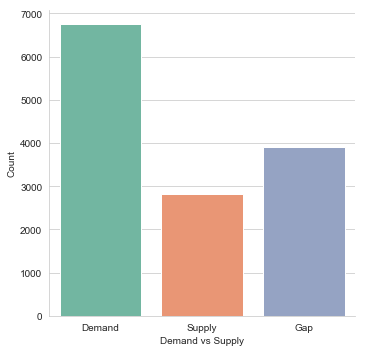

In [197]:
# Plot for Supply Demang Gap
g = sns.catplot(x="Status", kind="count", order = ['Demand','Supply','Gap'], data=UberData2,palette=sns.color_palette('Set2'))
g.set_axis_labels("Demand vs Supply" ,"Count")

### 4(b) - Plot - Supply Demand Gap by Pickup Point

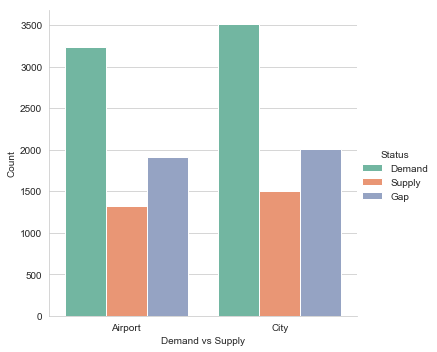

In [198]:
g=sns.catplot(x="Pickup point", hue="Status", kind="count", data=UberData2, hue_order = ['Demand','Supply','Gap'], 
            palette=sns.color_palette('Set2'))
g.set_axis_labels("Demand vs Supply" ,"Count")

### 4(c) - Plot - Supply Demand Gap by Pickup Point by Time Slots

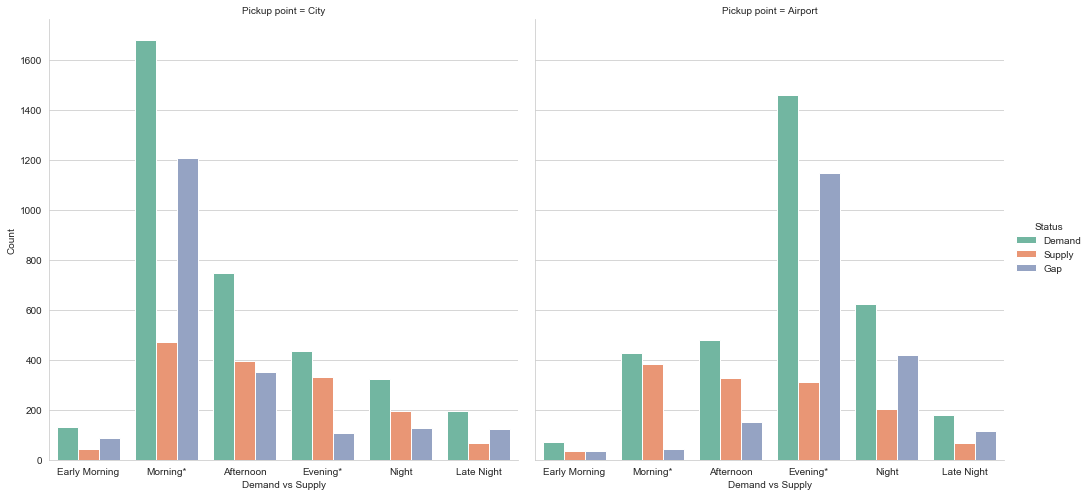

In [199]:
g=sns.catplot(x="TimeCat", hue="Status", kind="count", col="Pickup point", data=UberData2, 
              hue_order = ['Demand','Supply','Gap'], 
            palette=sns.color_palette('Set2'), height = 7, 
            order=["Early Morning","Morning*","Afternoon","Evening*","Night","Late Night"], col_order = ['City','Airport'])
g.set_axis_labels("Demand vs Supply" ,"Count")

# Note : * Showing Peak Hours in Time Slots

## Top Drivers Making Cancellation in city - airport trips

<Figure size 1440x576 with 0 Axes>

84.0     11
54.0     10
142.0    10
27.0      8
206.0     8
131.0     8
177.0     8
290.0     7
256.0     7
138.0     7
190.0     7
114.0     7
70.0      7
197.0     7
275.0     7
44.0      7
267.0     7
249.0     6
144.0     6
165.0     6
Name: Driver id, dtype: int64

[Text(0,0.5,'Count of Cancellation in City'), Text(0.5,0,'Driver id')]

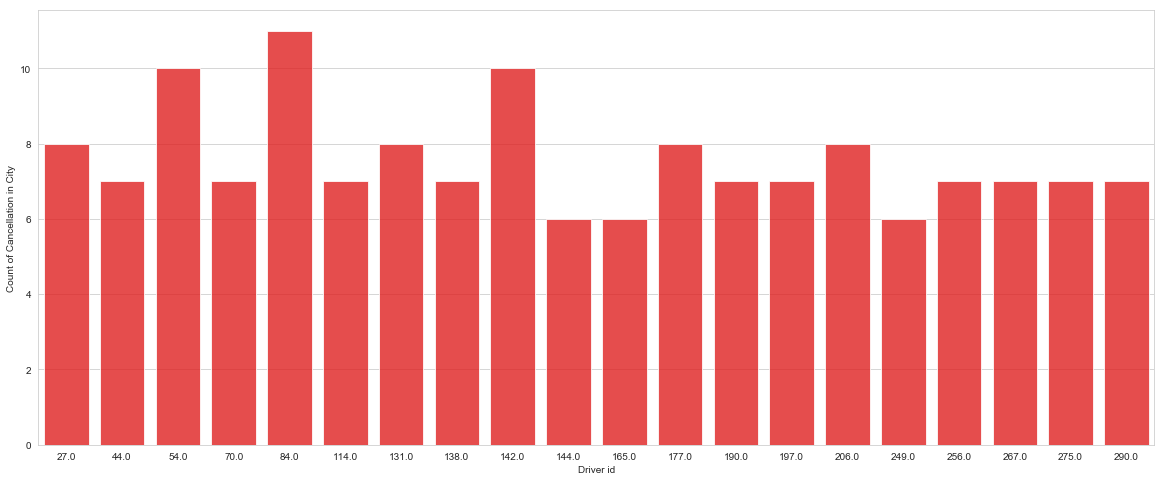

In [200]:
#For Driver Based Analysis - Top Drivers Cancelling request

# Filterd data for status cancelled in the city
DriverCancellingin_City = UberData[(UberData['Status'] == "Cancelled") & (UberData['Pickup point'] == "City")]

# Counting Values of driver id's
Driver = DriverCancellingin_City['Driver id'].value_counts().sort_values(ascending=False)

# Top 20 driver making cancellation in city and their id's
Driver = Driver [:20,]
plt.figure(figsize = (20,8))
Driver

#plot
g = sns.barplot(Driver.index, Driver.values, alpha=0.8, palette=sns.color_palette(['red']))
g.set(xlabel="Driver id", ylabel='Count of Cancellation in City')